In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import make_classification

In [3]:
X,Y=make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=0)

In [4]:
print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


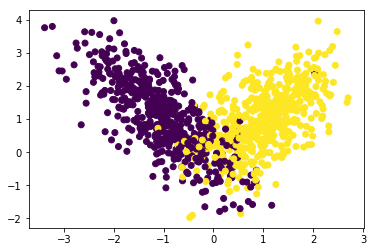

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [6]:
ones=np.ones((1000,1))
print(ones.shape)
X_train=np.hstack((ones,X))
print(X_train.shape)
print(X_train)

(1000, 1)
(1000, 3)
[[ 1.         -0.4002285  -0.92688039]
 [ 1.          1.07610199  1.18029069]
 [ 1.         -0.92295314  0.30616655]
 ...
 [ 1.         -2.37673965  3.03728951]
 [ 1.         -1.07726236  1.45397626]
 [ 1.          1.38028997  0.87341245]]


In [7]:
def h(x,theta):
    return 1.0/(1+np.exp(-np.dot(x,theta)))
def cost(X,Y,theta):
    m=X.shape[0]
    cost=0
    for i in range(m):
        hx=h(X[i],theta)
        cost+=Y[i]*np.log(hx)+(1-Y[i])*np.log(1-hx)
    return cost
def gradient(X,Y,theta):
    m=X.shape[0]
    n=X.shape[1]
    grad=np.zeros((n,))
    for i in range(m):
        for j in range(n):
            hx=h(X[i],theta)
            grad[j]+=(Y[i]-hx)*X[i][j]
    return grad
def gradientAscent(X,Y,learning_rate=0.01):
    theta=np.random.randn(X.shape[1])
    grad=np.zeros((X.shape[1],))
    m=X.shape[0]
    n=X.shape[1]
    for epoch in range(100):
        g=gradient(X,Y,theta)
        for j in range(n):
            theta[j]=theta[j]+learning_rate*g[j]
    return theta
        

In [8]:
a=np.array([1,2,3])
b=np.array([1,4,6])
np.dot(a,b)

27

In [9]:
theta=gradientAscent(X_train,Y)
print(theta)

[-0.38014359  3.69569571  0.60618308]


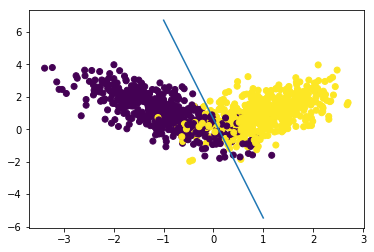

In [10]:
plt.scatter(X[:,0],X[:,1],c=Y)
x=np.linspace(-1,1,10)
y=(-theta[0]-theta[1]*x)/theta[2]
plt.plot(x,y)